# PINT Data Average Location Grouping Table

### Here I am looking at the PINT data for ages 0-5MA and with Normal Polarity. 
#### I begin by uploading the PINT excel file that has been converted to a cvs file where I only included columns with numeric values and, within the excel file, I renamed the original coloumn VDM/VADM to VDM_VADM for consistency. I then sort the data for AGE values less than 5 MA, then by increasing Latitude values. I then list the columns I need to work with to calculate VADM and Residual values. The columns selected can be adjusted by choosing to call or not to call the column into the 'int05intnew' dataframe. 

#### I then create a new table with only normal polarity data. We began with 1826 data points within 5MA but in only looking at Normal Polarity we are left with 977 data points.

In [35]:
import pandas as pd

pd.set_option('display.max_rows', 10)

pint_int = pd.read_csv('..\data\PINT9.8.csv')

pint_int
pint05int = pint_int[pint_int.AGE <= 5.00]

pint05int.sort_values(['SLAT'])

pint05intnew = pd.DataFrame()

#*Update* for correct columns listed below (when uploading new data)

pint05intnew['SLAT'] = pint05int.SLAT
pint05intnew['SLONG'] = pint05int.SLONG
pint05intnew['AGE'] = pint05int.AGE
pint05intnew['DAGE'] = pint05int.DAGE
pint05intnew['P'] = pint05int.P
pint05intnew['INC'] = pint05int.INC
pint05intnew['Nint'] = pint05int.Nint
pint05intnew['F'] = pint05int.F
pint05intnew['DF'] = pint05int.DF
pint05intnew['VDM'] = pint05int.VDM_VADM

pint05intnew.reset_index(inplace=True, drop=True) # reset index 

pint05intnew_N = pint05intnew[pint05intnew.P == 'N'] #looking only at normal polarity
pint05intnew_N

,SLAT,SLONG,AGE,DAGE,P,INC,Nint,F,DF,VDM
1,41.00000,45.00000,1.00000,1.00000,N,57.00000,6.00000,39.00000,25.00000,6.90000
16,40.00000,45.00000,3.50000,1.50000,N,NaN,13.00000,43.00000,14.00000,NaN
18,40.00000,45.00000,1.00000,1.00000,N,61.00000,9.00000,49.00000,6.00000,8.70000
20,40.20000,45.70000,1.00000,1.00000,N,61.00000,9.00000,49.00000,6.00000,8.30000
22,40.30000,44.40000,1.00000,0.30000,N,47.50000,45.00000,43.40000,2.00000,8.50000
...,...,...,...,...,...,...,...,...,...,...
1821,45.84800,3.02100,0.06960,0.01300,N,52.50000,1.00000,17.70000,NaN,3.30000
1822,32.99500,130.84600,0.26600,0.01400,N,48.50000,9.00000,24.90000,2.20000,4.90000
1823,32.97300,131.16300,0.14100,0.00500,N,79.20000,5.00000,22.90000,1.60000,3.10000
1824,32.84000,131.24600,0.12300,0.00600,N,51.00000,10.00000,28.30000,3.40000,5.40000


#### This function caclulates the degrees between two consecutive rows in the data table by taking the dot product between the cartesian coordinates of the two data points. For dot product values that are ~1.00001, I take them to be approximately 1 so that I avoid getting any NA values after the final calculation in degrees. 

In [2]:
def calculate_degrees(dataframe, x_col, z_col, first_index, second_index):
    
    dataframe_array = dataframe.iloc[:, x_col:z_col + 1].values
    
    a = (dataframe_array[first_index,:])
    b = (dataframe_array[second_index,:])
    d = (np.dot(a,b))
    
    if 1.000000 <= d <= 1.2:
        d = 1.00
        
    return np.degrees(np.arccos(d))

In [3]:
pint05intn = pint05intnew_N.copy() #copy table to a new one as to not revert previous setting on table

pint05intn = pint05intn.sort_values(['SLAT','SLONG']) #sort by increasing Latitude values
pint05intn.reset_index(inplace=True) #reset index column


In [4]:
import numpy as np

pd.set_option('display.max_rows', 10)

latr = np.radians(pint05intn.SLAT)   #converts Lat and Long values into radians
longr = np.radians(pint05intn.SLONG)

pint05intn['X']= np.cos(latr)*np.cos(longr)  #convert Lat and Long to cartesian X,Y,Z coordinates and creates X, Y, and Z columns 
pint05intn['Y']= np.cos(latr)*np.sin(longr)
pint05intn['Z']= np.sin(latr)

pint05intn


,index,SLAT,SLONG,AGE,DAGE,P,INC,Nint,F,DF,VDM,X,Y,Z
0,1453,-78.40000,164.21000,1.1800,0.0200,N,-78.0,1.0,46.3,NaN,6.4,-0.193490,0.054716,-0.979575
1,1454,-78.39000,164.20000,1.1800,0.0200,N,-83.2,1.0,39.4,NaN,5.2,-0.193645,0.054796,-0.979540
2,1443,-78.39000,164.21000,0.0840,0.0080,N,-85.9,2.0,27.2,1.7,3.5,-0.193655,0.054762,-0.979540
3,1440,-78.39000,164.23000,0.1200,0.0200,N,-84.2,4.0,26.0,2.9,3.4,-0.193674,0.054695,-0.979540
4,1441,-78.39000,164.27000,0.1200,0.0200,N,-82.8,3.0,25.4,3.5,3.4,-0.193712,0.054559,-0.979540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,1787,66.10000,-17.20000,0.7800,0.0400,N,73.8,1.0,33.8,NaN,4.9,0.387023,-0.119804,0.914254
973,1817,70.84644,9.03706,0.2925,0.0216,N,64.7,4.0,30.4,3.6,4.9,0.324028,0.051536,0.944643
974,1819,70.88377,8.79582,0.1438,0.0150,N,72.3,3.0,62.5,2.9,9.1,0.323634,0.050077,0.944856
975,1816,70.91960,8.71604,0.2300,0.2300,N,75.5,2.0,48.2,0.6,6.8,0.323119,0.049537,0.945061


### This functions to create groups based on the degrees calculated between two rows. It goes through the data table and holds rows together that are within 10 degrees of each other and goes on to evaluate rows thereafter to continue this matching process. 

In [5]:
pint05intn['Matched'] = False

X_col = pint05intn.columns.get_loc("X")
Z_col = pint05intn.columns.get_loc("Z")
matched_col = pint05intn.columns.get_loc("Matched")

groups = []

for first_index in range(len(pint05intn)):
    
    matched = pint05intn.iloc[first_index, matched_col]
    if not matched:
        row = pint05intn.iloc[first_index : first_index + 1,:]
        group = [row]
        pint05intn.at[first_index, 'Matched'] = True
        
        for second_index in range(len(pint05intn))[first_index+1:]:
            matched = pint05intn.iloc[second_index, matched_col]
            if not matched:
                degrees = calculate_degrees(pint05intn, X_col, Z_col, first_index, second_index)
                if(degrees < 10):
                    row = pint05intn.iloc[second_index : second_index + 1,:]
                    group.append(row)
                    pint05intn.at[second_index, 'Matched'] = True
        
        groups.append(pd.concat(group))

result = pd.concat(groups)

pint05intn = result

pint05intn.reset_index(drop=True, inplace=True) #reset index

apint05intn =  pint05intn.iloc[:, X_col:Z_col+1].values #each row needs its own x,y,z array

del pint05intn['Matched']

#### This utilizes the "calculate_degrees" function from above to calculate the degrees between the a single data point and the data point in the row directly below it. Then it creates a column for these values called "Degree". 

In [6]:
pd.set_option('display.max_rows', 10)

# compare each row to check degree col
# if less than 10 degrees begin a group

degree = []
rowIndex =  0

for rowIndex in range(len(apint05intn)-1):     
    degree.append(calculate_degrees(pint05intn, X_col, Z_col, rowIndex, rowIndex + 1))

pint05intn["Degree"] = pd.Series(degree)

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

pint05intn

,index,SLAT,SLONG,AGE,DAGE,P,INC,Nint,F,DF,VDM,X,Y,Z,Degree
0,1453,-78.40000,164.21000,1.18000,0.02000,N,-78.00000,1.00000,46.30000,NaN,6.40000,-0.19349,0.05472,-0.97958,0.01020
1,1454,-78.39000,164.20000,1.18000,0.02000,N,-83.20000,1.00000,39.40000,NaN,5.20000,-0.19365,0.05480,-0.97954,0.00201
2,1443,-78.39000,164.21000,0.08400,0.00800,N,-85.90000,2.00000,27.20000,1.70000,3.50000,-0.19365,0.05476,-0.97954,0.00402
3,1440,-78.39000,164.23000,0.12000,0.02000,N,-84.20000,4.00000,26.00000,2.90000,3.40000,-0.19367,0.05469,-0.97954,0.00805
4,1441,-78.39000,164.27000,0.12000,0.02000,N,-82.80000,3.00000,25.40000,3.50000,3.40000,-0.19371,0.05456,-0.97954,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,1787,66.10000,-17.20000,0.78000,0.04000,N,73.80000,1.00000,33.80000,NaN,4.90000,0.38702,-0.11980,0.91425,10.61863
973,1817,70.84644,9.03706,0.29250,0.02160,N,64.70000,4.00000,30.40000,3.60000,4.90000,0.32403,0.05154,0.94464,0.08745
974,1819,70.88377,8.79582,0.14380,0.01500,N,72.30000,3.00000,62.50000,2.90000,9.10000,0.32363,0.05008,0.94486,0.04433
975,1816,70.91960,8.71604,0.23000,0.23000,N,75.50000,2.00000,48.20000,0.60000,6.80000,0.32312,0.04954,0.94506,0.16270


### This gives me the average Latitude and Longitude for the created groups. I then make several other calculations for the data groups. 

In [7]:
pd.set_option('display.max_rows', 10)

df = pint05intn

avglat = []             # Average Latitude of group
avglong = []            # Average Longitude of group 
degreefa = []           # Degrees from Average group location 
avgintgroups = []       # Average Intensity of group 
fstdv = []              # Standard Deviation of Intensity within group
groupcount = []         # Counts the number of data points within a group 
vadmavgs = []           # Calculates the average group VADMs from the individual VADMs calculated in col "VADMCalculated"
vadmstdvs = []          # Calculates the Standard Deviation for the group VADM
vadmstdvs_weight = []   # Calculates the weighted Standard Deviation for the group VADM 
age_range = []          # Max age - Min age of the group for the range of age being covered
age_range_min = []      # Minimum age within a group
age_range_max = []      # Maximum age within a group

startIndex = 0
endIndex = 0
length = len(df)
int_col = df.columns.get_loc("F")
age_col = df.columns.get_loc("AGE")

X_col = pint05intn.columns.get_loc("X")
Z_col = pint05intn.columns.get_loc("Z")

t = np.radians(90 - df['SLAT'])
f = df['F']/10**6
r = 6.3781*10 ** 6
mu = 4*np.pi*10 ** -7
I = np.radians(df['INC'])
t_m = np.arctan(np.tan(np.tan(I)/2))

#VADM calculation: 
df["VADMCalculated"] = ((f/(np.sqrt(1+3*(np.cos(t)) ** 2)))*((4*np.pi*r ** 3)/mu))/10**22    # units =ZAm^2
vadmcalc_col = df.columns.get_loc("VADMCalculated")

for rowIndex, value in df.Degree.items():
    
    if value <= 10 and endIndex != length - 1:
        endIndex += 1
        avglat.append('\/')
        avglong.append('\/')
        avgintgroups.append('\/')
        fstdv.append('\/')
        groupcount.append('\/')
        vadmavgs.append('\/')
        vadmstdvs.append('\/')
        vadmstdvs_weight.append('\/')
        age_range.append('\/')
        age_range_min.append('\/')
        age_range_max.append('\/')

        
    elif startIndex != endIndex:
        
        cartpos = df.iloc[startIndex:endIndex+1, X_col:Z_col+1]
        avgcart = np.average(cartpos.values, axis=0)
                
        x1 = avgcart[0]
        y1 = avgcart[1]
        z1 = avgcart[2]
        
        lt = np.degrees(np.arcsin(z1))
        lg = np.degrees(np.arctan2(y1,x1))
       
        avglat.append(lt)
        avglong.append(lg)
        
        index = rowIndex - 1
        
        intensitygroup = df.iloc[startIndex:endIndex+1, int_col]
        avgint = np.average(intensitygroup.values, axis=0)
        avgintgroups.append(avgint)
        
        intensitystdv = np.std(intensitygroup)
        fstdv.append(intensitystdv)
        
        groupcount.append(cartpos.shape[0])
        
        vadmcalculatedgroup = df.iloc[startIndex:endIndex+1, vadmcalc_col]
        vadmcalcavg = np.average(vadmcalculatedgroup.values, axis=0)
        vadmavgs.append(vadmcalcavg)
        
        vadmstdvgroup = (np.std(vadmcalculatedgroup))
        vadmstdvs.append(vadmstdvgroup)
        
        vadmstdvgroup_weighted = (np.std(vadmcalculatedgroup)) / np.sqrt(cartpos.shape[0])
        vadmstdvs_weight.append(vadmstdvgroup_weighted)
        
        vadmcalculatedcol = df.iloc[:, vadmcalc_col]
        vadmglobal = np.average(vadmcalculatedcol)
        
        agegroup = df.iloc[startIndex:endIndex+1, age_col]
        age_range_calc = (max(agegroup) - min(agegroup))
        age_range.append(age_range_calc)

        age_range_mincal = min(agegroup)
        age_range_min.append(age_range_mincal)
        
        age_range_maxcal = max(agegroup)
        age_range_max.append(age_range_maxcal)
               
        while index >= 0 and avglat[index] == '\/':
            avglat[index] = lt
            avglong[index] = lg
            avgintgroups[index] = avgint
            fstdv[index] = intensitystdv
            groupcount[index] = cartpos.shape[0]
            vadmavgs[index] = vadmcalcavg
            vadmstdvs[index] = vadmstdvgroup
            vadmstdvs_weight[index] = vadmstdvgroup_weighted
            age_range[index] = age_range_calc
            age_range_min[index] = age_range_mincal
            age_range_max[index] = age_range_maxcal
            
            index -= 1
        
        startIndex = rowIndex + 1
        endIndex = startIndex
        
    else: 
        avglat.append('0')
        avglong.append('0')
        avgintgroups.append('0')
        fstdv.append('0')
        groupcount.append('0')
        vadmavgs.append('0')
        vadmstdvs.append('0')
        vadmstdvs_weight.append('0')
        age_range.append('0')
        age_range_min.append('0')
        age_range_max.append('0')
        
        startIndex = rowIndex + 1
        endIndex = startIndex

df["AvgLat"] = pd.Series(avglat)    #Avg latitude of a group 
df["AvgLong"] = pd.Series(avglong)  #Avg longitude of a group 

print("Global Axial Dipole, VADM:", vadmglobal)  #GAD calculation (avg of calculated vadms) 


# Find the Degrees from the calculated Avgerage location (avglat and avglong) for each data point 
# I am doing so by convertingto cartesian then taking the dot between the Original location and Avg location

latra = np.radians(df.AvgLat.astype(float))
longra = np.radians(df.AvgLong.astype(float))

df['X_a']= np.cos(latra)*np.cos(longra)
df['Y_a']= np.cos(latra)*np.sin(longra)
df['Z_a']= np.sin(latra)
 
X_a_col = df.columns.get_loc("X_a")
Z_a_col = df.columns.get_loc("Z_a")+1

SSavgarr = df.iloc[:, X_a_col:Z_a_col].values   # array of all X,Y,Z

for row in range(len(SSavgarr)):
    a = (apint05intn[row,:])
    b = (SSavgarr[row,:])
    d = np.dot(a,b)
    
    if 1.000000 <= d <= 1.2:
        d = 1.00
    
    degreefa.append(np.degrees(np.arccos(d)))
    
#  degreefa fills in the 'DegreeFmAvg' column

df["VDMCalculated"] = (f*(4*np.pi*r**3)*(np.sqrt(1+3*(np.cos(I))**2))/(2*mu))/10**22

df["VADMStdv"] = pd.Series(vadmstdvs)
df["VADMStdvWeighted"] = pd.Series(vadmstdvs_weight)
df["VADMAvg"] = pd.Series(vadmavgs)
df["DegreeFmAvg"] = pd.Series(degreefa) 
df["AvgF"] = pd.Series(avgintgroups)
df["StdvF"] = pd.Series(fstdv)
df["GroupAmount"] = pd.Series(groupcount)
df["AgeRange"] = pd.Series(age_range)
df["MinAge of Group"] = pd.Series(age_range_min)
df["MaxAge of Group"] = pd.Series(age_range_max)

SS_avgs = df
SS_avgs


Global Axial Dipole, VADM: 7.213099161423251


,index,SLAT,SLONG,AGE,DAGE,P,INC,Nint,F,DF,...,VADMStdv,VADMStdvWeighted,VADMAvg,DegreeFmAvg,AvgF,StdvF,GroupAmount,AgeRange,MinAge of Group,MaxAge of Group
0,1453,-78.40000,164.21000,1.18000,0.02000,N,-78.00000,1.00000,46.30000,NaN,...,2.27641,0.41561,4.28449,0.42629,32.48000,17.23259,30,2.24500,0.05500,2.30000
1,1454,-78.39000,164.20000,1.18000,0.02000,N,-83.20000,1.00000,39.40000,NaN,...,2.27641,0.41561,4.28449,0.41811,32.48000,17.23259,30,2.24500,0.05500,2.30000
2,1443,-78.39000,164.21000,0.08400,0.00800,N,-85.90000,2.00000,27.20000,1.70000,...,2.27641,0.41561,4.28449,0.41724,32.48000,17.23259,30,2.24500,0.05500,2.30000
3,1440,-78.39000,164.23000,0.12000,0.02000,N,-84.20000,4.00000,26.00000,2.90000,...,2.27641,0.41561,4.28449,0.41553,32.48000,17.23259,30,2.24500,0.05500,2.30000
4,1441,-78.39000,164.27000,0.12000,0.02000,N,-82.80000,3.00000,25.40000,3.50000,...,2.27641,0.41561,4.28449,0.41221,32.48000,17.23259,30,2.24500,0.05500,2.30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,1787,66.10000,-17.20000,0.78000,0.04000,N,73.80000,1.00000,33.80000,NaN,...,5.94802,1.10452,7.89383,1.53398,56.55172,42.66228,29,3.72000,0.78000,4.50000
973,1817,70.84644,9.03706,0.29250,0.02160,N,64.70000,4.00000,30.40000,3.60000,...,1.98934,0.99467,7.09121,0.12601,52.42500,14.71468,4,0.14870,0.14380,0.29250
974,1819,70.88377,8.79582,0.14380,0.01500,N,72.30000,3.00000,62.50000,2.90000,...,1.98934,0.99467,7.09121,0.03955,52.42500,14.71468,4,0.14870,0.14380,0.29250
975,1816,70.91960,8.71604,0.23000,0.23000,N,75.50000,2.00000,48.20000,0.60000,...,1.98934,0.99467,7.09121,0.01082,52.42500,14.71468,4,0.14870,0.14380,0.29250


#### This is to check how many data points did not get grouped. As shown only 1 data point did not get assigned a group and will get dropped from the table.

In [8]:
pd.set_option('display.max_columns', None)

SS_avgsc = SS_avgs.copy()

del SS_avgsc["X"]
del SS_avgsc["Y"]
del SS_avgsc["Z"]
del SS_avgsc["X_a"]
del SS_avgsc["Y_a"]
del SS_avgsc["Z_a"]

no_avg_pts = SS_avgsc[SS_avgsc.AvgLat == '0']  
no_avg_pts

,index,SLAT,SLONG,AGE,DAGE,P,INC,Nint,F,DF,VDM,Degree,VADMCalculated,AvgLat,AvgLong,VDMCalculated,VADMStdv,VADMStdvWeighted,VADMAvg,DegreeFmAvg,AvgF,StdvF,GroupAmount,AgeRange,MinAge of Group,MaxAge of Group
734,1621,32.77100,230.32500,0.18500,0.00700,N,46.40000,4.00000,41.20000,1.00000,8.30000,102.10140,7.79852,0,0,8.32629,0,0,0,122.46740,0,0,0,0,0,0


#### This is to arrange the dataframe with the main columns and calculate the Global Axial Dipole (GAD). 

#### The cell below can be run to check the difference in VDM calculated and measured and the residual from the GAD but I do not necessarily need them so it is not going to be included in the table.

In [9]:
# To check the difference between recorded VDM and the expected/calculated VDM run:
#      SS_avgsc["VDMCalc-VDM"] = SS_avgsc['VDMCalculated'] - SS_avgs['VDM']
# To check the residual from the global VADM run: 
#      SS_avgsc["Residual"] = SS_avgsc['VADMCalculated'] - vadmglobal 

In [10]:
pd.set_option('display.max_columns', None)

SS_avgsc.drop(SS_avgsc[SS_avgsc.AvgLat == '0'].index, inplace = True)


sscols = SS_avgsc.columns.tolist()
sscols = ['SLAT',
 'SLONG',
 'AGE',
 'DAGE',
 'F','DF',
 'P',
 'VDM','INC',
 'VADMCalculated','VDMCalculated','VADMAvg', 'VADMStdv', 'VADMStdvWeighted',
 'AvgLat',
 'AvgLong',
 'DegreeFmAvg',
 'AvgF',
 'StdvF',
 'GroupAmount', 'AgeRange', 'MinAge of Group', 'MaxAge of Group']
SS_avgsc = SS_avgsc[sscols]

#calculate the 
vadmcalculatedcol = df.iloc[:, df.columns.get_loc("VADMCalculated")]
vadmgloabal = np.average(vadmcalculatedcol) #= ZAm^2
print("Global Axial Dipole, VADM:", vadmglobal)

SS_avgsc

Global Axial Dipole, VADM: 7.213099161423251


,SLAT,SLONG,AGE,DAGE,F,DF,P,VDM,INC,VADMCalculated,VDMCalculated,VADMAvg,VADMStdv,VADMStdvWeighted,AvgLat,AvgLong,DegreeFmAvg,AvgF,StdvF,GroupAmount,AgeRange,MinAge of Group,MaxAge of Group
0,-78.40000,164.21000,1.18000,0.02000,46.30000,NaN,N,6.40000,-78.00000,6.09975,6.38415,4.28449,2.27641,0.41561,-78.01185,165.07243,0.42629,32.48000,17.23259,30,2.24500,0.05500,2.30000
1,-78.39000,164.20000,1.18000,0.02000,39.40000,NaN,N,5.20000,-83.20000,5.19085,5.21779,4.28449,2.27641,0.41561,-78.01185,165.07243,0.41811,32.48000,17.23259,30,2.24500,0.05500,2.30000
2,-78.39000,164.21000,0.08400,0.00800,27.20000,1.70000,N,3.50000,-85.90000,3.58353,3.55564,4.28449,2.27641,0.41561,-78.01185,165.07243,0.41724,32.48000,17.23259,30,2.24500,0.05500,2.30000
3,-78.39000,164.23000,0.12000,0.02000,26.00000,2.90000,N,3.40000,-84.20000,3.42543,3.42429,4.28449,2.27641,0.41561,-78.01185,165.07243,0.41553,32.48000,17.23259,30,2.24500,0.05500,2.30000
4,-78.39000,164.27000,0.12000,0.02000,25.40000,3.50000,N,3.40000,-82.80000,3.34639,3.37192,4.28449,2.27641,0.41561,-78.01185,165.07243,0.41221,32.48000,17.23259,30,2.24500,0.05500,2.30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,66.10000,-17.20000,0.78000,0.04000,33.80000,NaN,N,4.90000,73.80000,4.68260,4.87003,7.89383,5.94802,1.10452,64.64107,-18.33768,1.53398,56.55172,42.66228,29,3.72000,0.78000,4.50000
973,70.84644,9.03706,0.29250,0.02160,30.40000,3.60000,N,4.90000,64.70000,4.11337,4.90670,7.09121,1.98934,0.99467,70.90952,8.70407,0.12601,52.42500,14.71468,4,0.14870,0.14380,0.29250
974,70.88377,8.79582,0.14380,0.01500,62.50000,2.90000,N,9.10000,72.30000,8.45537,9.16372,7.09121,1.98934,0.99467,70.90952,8.70407,0.03955,52.42500,14.71468,4,0.14870,0.14380,0.29250
975,70.91960,8.71604,0.23000,0.23000,48.20000,0.60000,N,6.80000,75.50000,6.51976,6.81573,7.09121,1.98934,0.99467,70.90952,8.70407,0.01082,52.42500,14.71468,4,0.14870,0.14380,0.29250


### Below is a table with group averages and information about the created groups. This is the data for locations grouped together based on if they fall within 10 degerees from each other, for normal polarity and ages less than 5ma. 

#### Note: When looking at all polarities we get 31 groups with 17 having more than 10 data point values.

In [16]:
pd.set_option('display.max_rows', None)

SS_avgsgroups = SS_avgsc.copy()

# This creates a T/F column to collect the first row from the data groups
SS_avgsgroups['GroupLead'] = SS_avgsgroups['GroupAmount'].ne(SS_avgsgroups['GroupAmount'].shift(-1))

SS_avgsgroups


SSgroups = SS_avgsgroups[SS_avgsgroups.GroupLead == True]
del SSgroups['GroupLead']
del SSgroups['DegreeFmAvg']
del SSgroups['AGE']
del SSgroups['DAGE']
del SSgroups['F']
del SSgroups['DF']
del SSgroups['VDM']
del SSgroups['INC']
del SSgroups['VADMCalculated']
del SSgroups['VDMCalculated']


print('\nThere are a total of',len(SSgroups), 'groups') 
print('And there are',len(SSgroups[SSgroups.GroupAmount >= 10]), 'groups with more than 10 data point values\n') 

SSgroups.columns.name = 'SITE INFO:'

# To save this table as an excel file run: 
#    SSgroups.to_excel("../data/" + "5MA_5degGroups_PINT.xlsx")  

SSgroups


There are a total of 27 groups
And there are 15 groups with more than 10 data point values



SITE INFO:,SLAT,SLONG,P,VADMAvg,VADMStdv,VADMStdvWeighted,AvgLat,AvgLong,AvgF,StdvF,GroupAmount,AgeRange,MinAge of Group,MaxAge of Group
29,-77.45700,166.91000,N,4.28449,2.27641,0.41561,-78.01185,165.07243,32.48000,17.23259,30,2.24500,0.05500,2.30000
31,-54.00000,3.50000,N,5.66397,0.55458,0.39214,-54.34851,1.26917,37.70000,3.80000,2,0.15000,0.15000,0.30000
43,-36.77000,174.89000,N,5.96239,2.38668,0.68897,-38.60533,175.39431,33.89167,13.67927,12,0.86000,0.14000,1.00000
46,-37.60000,143.90000,N,11.25579,0.86205,0.49771,-37.66661,144.19946,63.16667,4.82862,3,0.00000,2.25000,2.25000
48,-36.00000,-71.00000,N,7.11814,1.33635,0.94495,-36.00000,-71.00000,39.15000,7.35000,2,0.01600,0.78400,0.80000
55,-29.00000,167.80000,N,8.77967,1.94524,0.73523,-29.00000,167.80000,44.18571,9.78985,7,0.00000,2.73000,2.73000
115,-20.20000,57.30000,N,8.77539,2.56928,0.33169,-20.95990,55.59044,39.79333,11.66786,60,1.77700,0.07300,1.85000
161,-16.44000,-152.25000,N,4.66938,2.84668,0.41972,-16.87303,-151.13715,20.12826,12.24526,46,4.10000,0.51000,4.61000
175,19.37530,-102.98300,N,6.38550,3.39641,1.28372,15.07388,-103.41861,27.80000,15.62041,7,3.46700,0.06100,3.52800
191,16.10000,-61.80000,N,5.84713,1.90902,0.67494,16.01250,-61.71249,24.97500,8.15150,8,0.70800,0.07700,0.78500


#### This plot depicts the age ranges or lack thereof for the groups.

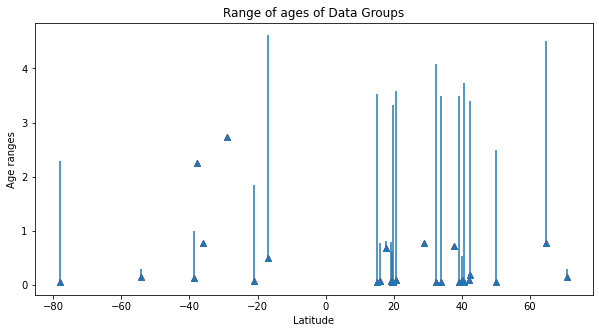

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('Age ranges') 
plt.title('Range of ages of Data Groups')

plt.plot(SSgroups.AvgLat, SSgroups["MinAge of Group"], 'r^')

lower_error = np.zeros(27) #adjust for how many groups there are (ex. 27 groups -> 27)
upper_error = SSgroups["AgeRange"]
asymmetric_error = [lower_error, upper_error]

plt.errorbar(SSgroups.AvgLat, SSgroups["MinAge of Group"], yerr = asymmetric_error, fmt = '^')
plt.savefig('../figs/' + 'AgeRangeOfGroups.png', dpi=150)

#### These new columns calculate the residuals for the groups as such 

In [21]:
SSgroups_gad = SSgroups.copy()

SSgroups_gad["Residual"] = SSgroups_gad["VADMAvg"] - vadmglobal 
SSgroups_gad["Residual/stdv"] = SSgroups_gad["Residual"]/SSgroups_gad["VADMStdv"] 
SSgroups_gad["ResidualWeighted"] = SSgroups_gad["Residual"]/SSgroups_gad["VADMStdvWeighted"] 

SSgroups_gad

SITE INFO:,SLAT,SLONG,P,VADMAvg,VADMStdv,VADMStdvWeighted,AvgLat,AvgLong,AvgF,StdvF,GroupAmount,AgeRange,MinAge of Group,MaxAge of Group,Residual,Residual/stdv,ResidualWeighted
29,-77.45700,166.91000,N,4.28449,2.27641,0.41561,-78.01185,165.07243,32.48000,17.23259,30,2.24500,0.05500,2.30000,-2.92861,-1.28650,-7.04648
31,-54.00000,3.50000,N,5.66397,0.55458,0.39214,-54.34851,1.26917,37.70000,3.80000,2,0.15000,0.15000,0.30000,-1.54913,-2.79336,-3.95041
43,-36.77000,174.89000,N,5.96239,2.38668,0.68897,-38.60533,175.39431,33.89167,13.67927,12,0.86000,0.14000,1.00000,-1.25071,-0.52404,-1.81533
46,-37.60000,143.90000,N,11.25579,0.86205,0.49771,-37.66661,144.19946,63.16667,4.82862,3,0.00000,2.25000,2.25000,4.04269,4.68962,8.12266
48,-36.00000,-71.00000,N,7.11814,1.33635,0.94495,-36.00000,-71.00000,39.15000,7.35000,2,0.01600,0.78400,0.80000,-0.09496,-0.07106,-0.10050
55,-29.00000,167.80000,N,8.77967,1.94524,0.73523,-29.00000,167.80000,44.18571,9.78985,7,0.00000,2.73000,2.73000,1.56657,0.80534,2.13072
115,-20.20000,57.30000,N,8.77539,2.56928,0.33169,-20.95990,55.59044,39.79333,11.66786,60,1.77700,0.07300,1.85000,1.56229,0.60806,4.71005
161,-16.44000,-152.25000,N,4.66938,2.84668,0.41972,-16.87303,-151.13715,20.12826,12.24526,46,4.10000,0.51000,4.61000,-2.54372,-0.89358,-6.06052
175,19.37530,-102.98300,N,6.38550,3.39641,1.28372,15.07388,-103.41861,27.80000,15.62041,7,3.46700,0.06100,3.52800,-0.82760,-0.24367,-0.64468
191,16.10000,-61.80000,N,5.84713,1.90902,0.67494,16.01250,-61.71249,24.97500,8.15150,8,0.70800,0.07700,0.78500,-1.36597,-0.71553,-2.02383


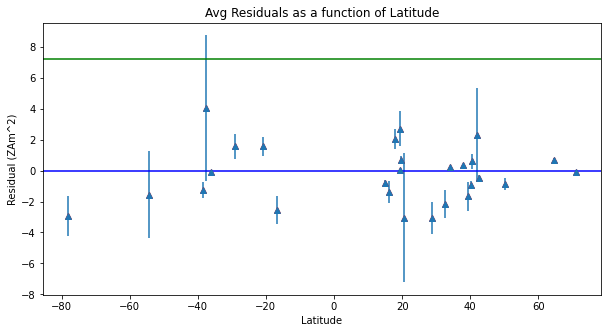

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('Residual (ZAm^2)') 
plt.title('Avg Residuals as a function of Latitude')

plt.plot(SSgroups_gad.AvgLat, SSgroups_gad.Residual, 'r^')
plt.errorbar(SSgroups_gad.AvgLat, SSgroups_gad.Residual, yerr = SSgroups_gad['Residual/stdv'], fmt = '^')
plt.axhline(y=vadmglobal, color='g')
plt.axhline(y=0, color='b')

# plt.savefig('../figs/' + 'AvgResidualsVSlatitude.png', dpi=150)

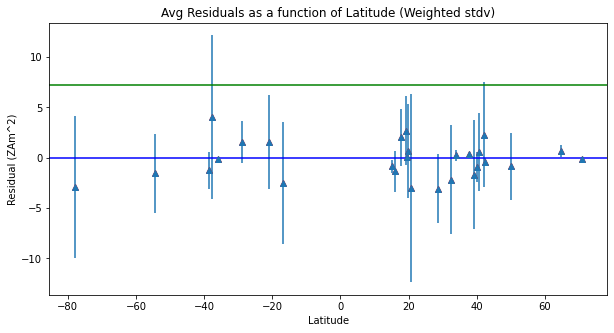

In [37]:
plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('Residual (ZAm^2)') 
plt.title('Avg Residuals as a function of Latitude (Weighted stdv)')

plt.plot(SSgroups_gad.AvgLat, SSgroups_gad.Residual, 'r^')
plt.errorbar(SSgroups_gad.AvgLat, SSgroups_gad.Residual, yerr = SSgroups_gad['ResidualWeighted'], fmt = '^')
plt.axhline(y=vadmglobal, color='g')
plt.axhline(y=0, color='b')

# plt.savefig('../figs/' + 'AvgResidualsweightedVSlatitude.png', dpi=150)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

### This plots the average locations in white and plots any non-grouped points in red. 

C:\Users\trin\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


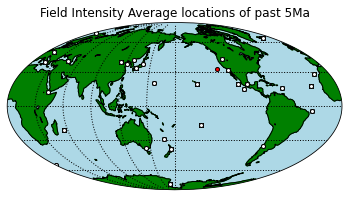

In [25]:
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=180))


gl=ax.gridlines(crs=ccrs.PlateCarree(),color='black',linewidth=1,linestyle='dotted')
gl.xlabels_top = False
gl.ylocator=mticker.FixedLocator(np.arange(-90,91,30))
gl.xlocator=mticker.FixedLocator(np.arange(0,400,30));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('Field Intensity Average locations of past 5Ma')

ax.add_feature(OCEAN,color='lightblue')
ax.add_feature(LAND,color='green')
ax.add_feature(LAKES,facecolor='lightblue',edgecolor='black')
ax.plot([SS_avgsc.AvgLong.values],[SS_avgsc.AvgLat.values],marker='o',color='white',\
        markersize=4,transform=ccrs.Geodetic(),markeredgecolor='black')
ax.plot([no_avg_pts.SLONG.values],[no_avg_pts.SLAT.values],marker='o',color='red',\
        markersize=4,transform=ccrs.Geodetic(),markeredgecolor='black')

ax.set_global()

ax.coastlines();

#plt.savefig('../figs/' + 'pintavglocations5malarge.png', dpi=150)

<ErrorbarContainer object of 3 artists>

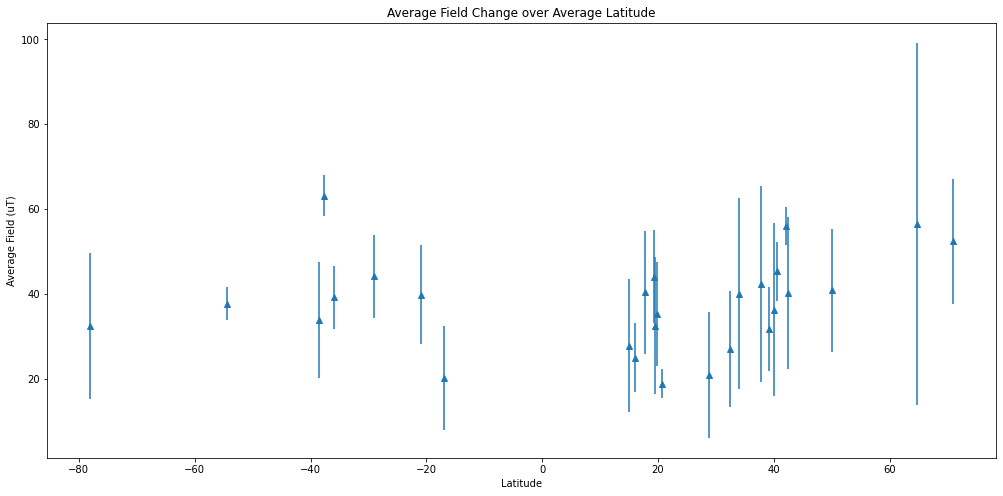

In [38]:
# Avg Field vs. Latitude

plt.figure(figsize=(17, 8))

plt.xlabel('Latitude')
plt.ylabel('Average Field (uT)') 
plt.title('Average Field Change over Average Latitude')

plt.errorbar(SSgroups.AvgLat, SSgroups.AvgF, yerr = SSgroups.StdvF, fmt = '^')

# plt.savefig('../figs/' + 'AvgfieldVSavglatitude.png', dpi=150)

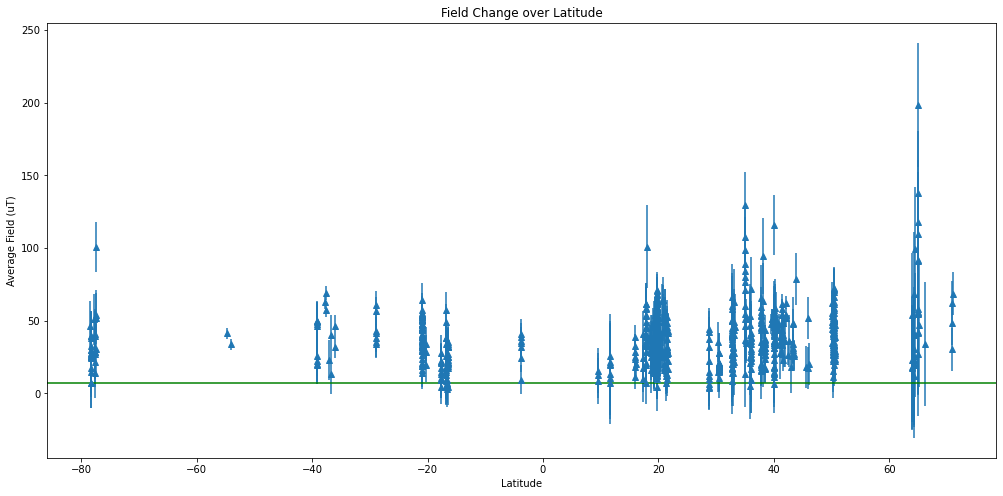

In [28]:
plt.figure(figsize=(17, 8))

plt.xlabel('Latitude')
plt.ylabel('Average Field (uT)') 
plt.title('Field Change over Latitude')

plt.errorbar(SS_avgsc.SLAT, SS_avgsc.F, yerr = SS_avgsc.StdvF, fmt = '^')
plt.axhline(y=vadmgloabal, color='g')

# plt.savefig('../figs/' + 'FieldVSlatitude.png', dpi=150)

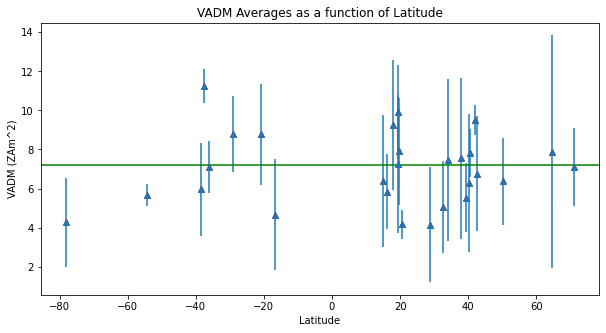

In [29]:
plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('VADM (ZAm^2)') 
plt.title('VADM Averages as a function of Latitude')

plt.plot(SSgroups.AvgLat, SSgroups.VADMAvg, 'r^')
plt.errorbar(SSgroups.AvgLat, SSgroups.VADMAvg, yerr = SSgroups.VADMStdv, fmt = '^')
plt.axhline(y=vadmglobal, color='g')

# plt.savefig('../figs/' + 'VADMavgsVSlatitude.png', dpi=150)

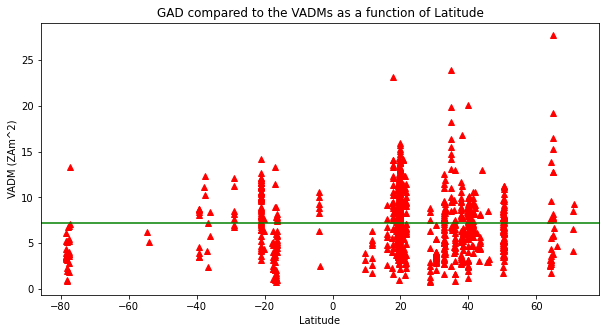

In [39]:
plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('VADM (ZAm^2)') 
plt.title('GAD compared to the VADMs as a function of Latitude')

plt.plot(SS_avgsc.SLAT, SS_avgsc.VADMCalculated, 'r^')
#plt.errorbar(SSgroups.AvgLat, SSgroups.VADMAvg, yerr = SSgroups.VADMStdv, fmt = '^')
plt.axhline(y=vadmglobal, color='g')

# plt.savefig('../figs/' + 'GAD_VADMsVSlatitude.png', dpi=150)

### This plots the points based on polarity, detailed by the legend (R = reverse polarity, N = normal polarity, T = Transitional).

In [32]:
polarity = ['R', 'N', 'T']
colors=['purple','blue','yellow']

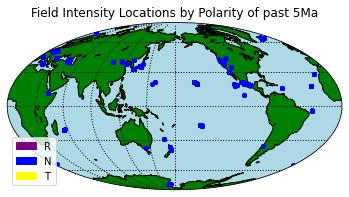

In [22]:
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=180))


gl=ax.gridlines(crs=ccrs.PlateCarree(),color='black',linewidth=1,linestyle='dotted')
gl.top_lab = False
gl.ylocator=mticker.FixedLocator(np.arange(-90,91,30))
gl.xlocator=mticker.FixedLocator(np.arange(0,400,30));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('Field Intensity Locations by Polarity of past 5Ma')

ax.add_feature(OCEAN,color='lightblue')
ax.add_feature(LAND,color='green')
ax.add_feature(LAKES,facecolor='lightblue',edgecolor='black')

last_bin = 0

for r in polarity:
    P = SS_avgsc[(SS_avgsc.P==r)&(SS_avgsc.P!=last_bin)]
    
    plt.plot([P.SLONG.values],[P.SLAT.values],marker='o',color= colors[polarity.index(r)],markersize=4,transform=ccrs.Geodetic())
    
    last_bin=r
    
import matplotlib.patches as mpatches
R_ = mpatches.Patch(color='purple', label='R')
N_ = mpatches.Patch(color='blue', label='N')
T_ = mpatches.Patch(color='yellow', label='T')
plt.legend(handles=[R_,N_,T_])

    
ax.set_global()

ax.coastlines();

#plt.savefig('../figs/' + 'fieldintensityPolarity.png', dpi=150)

In [34]:
# This saves the group table with residuals as a data table within python 

SSgroups_gad.to_pickle("PINT_AvgGroups.pkl")
